## Linear and Logistic Regression


**Note:** To run cells, press *Shift* *Enter*.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install git+https://github.com/netbrainml/nbml.git
from nbml.workshops.regression.utils import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

  Cloning https://github.com/netbrainml/nbml.git to /tmp/pip-req-build-im9_qa_v
  Running command git clone -q https://github.com/netbrainml/nbml.git /tmp/pip-req-build-im9_qa_v
  Created wheel for nbml: filename=nbml-0.0.1-cp36-none-any.whl size=11985 sha256=9c3057aad235f2600fe213037ae95620bfa6f70f5696dd7f40032046e0009e1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-bksw80__/wheels/3a/b1/27/4431be29eb1fbe8f0912364e44fecc078167c19415ed958b11
Successfully built nbml
You should consider upgrading via the 'pip install --upgrade pip' command.


**What is numpy**
    
    A easy way to work matrices, which is useful for handling necessary tasks in machine learning
    To install numpy onto your local computer(Python environment), open your command line terminal and enter:
    
*Try one of these commands depending on your setup*
*     pip install numpy
*     pip3 install numpy
*     conda install numpy
*     py -m pip install numpy
            

Numpy Examples

In [3]:
a = np.ones(shape=(3,3)) * 2
b = np.ones(shape=(1,3)) * 3

print(f'''
Matrices: \n{a},{b}\n
Matrix addition: \n{a+b}\n
Element-wise Multiplication: \n{a*b}\n
Matrix Multiplication: \n{np.matmul(a,a.transpose())}\n
Transpose shapes: {b.shape, b.transpose().shape}
        ''')


Matrices: 
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]],[[3. 3. 3.]]

Matrix addition: 
[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]

Element-wise Multiplication: 
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]

Matrix Multiplication: 
[[12. 12. 12.]
 [12. 12. 12.]
 [12. 12. 12.]]

Transpose shapes: ((1, 3), (3, 1))
        


### Linear Regression
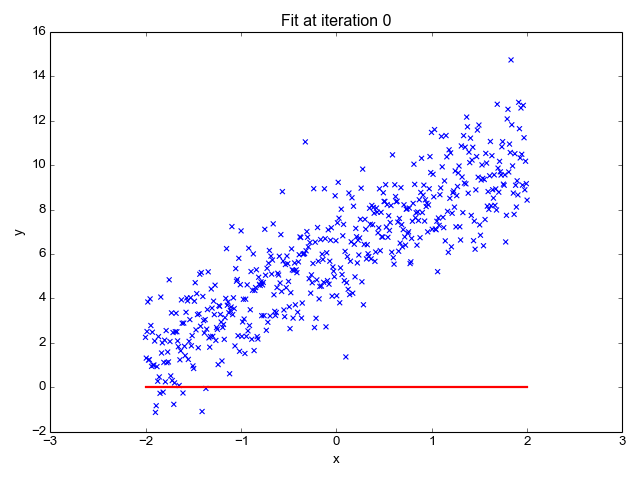

This function gets our X,Y, slope, and bias

Our actual slope and bias is: (23, 41)


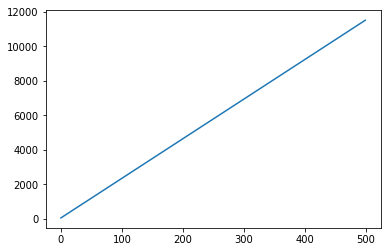

In [4]:
X,Y,slope,bias = get_data()
plt.plot(X,Y); plt.show()

Assume we do not know what the slope and bias is.
We need to initialize our slope and bias

In [5]:
import random
init_slope =  random.randint(0,100)
init_bias = random.randint(0,100)
parameters = [init_slope, init_bias]

f"Our current slope and bias is: {parameters})"

'Our current slope and bias is: [76, 18])'

This is what our prediction looks like compared to our actual

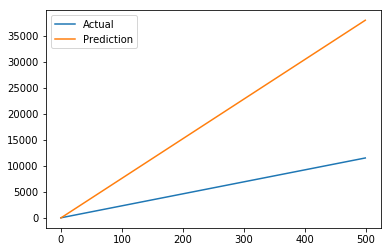

In [6]:
Y_prediction = np.array(X*init_slope+init_bias)

visualize(X,Y,Y_prediction)

### How are we going to get our parameters to match the actual parameters?
    First we need a way to determine how bad our prediction is. We call this our loss function.
    We can use this loss function and take its deriviative to figure out how to fix our parameters.
    We use the partial derivative in respects to each parameter to update.

### MSE Loss Formula
![](https://www.oreilly.com/library/view/machine-learning-with/9781785889936/assets/image_07_002.jpg)

****How can we set this equation to zero? ****

We can take the derivative in respects to the parameters (otherwise known as partial derivative)

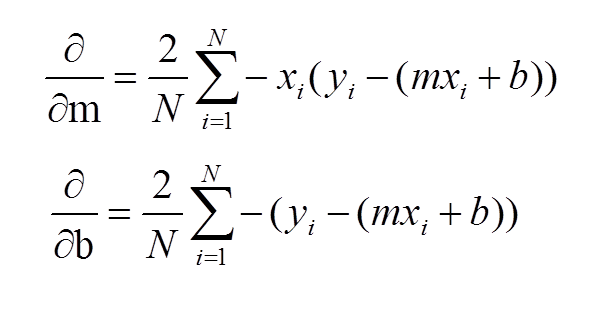

Then, we update the parameters using these values.

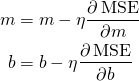

In [7]:
def MSELoss(X, Y_actual, Y_pred):
    return 1/(2*X.shape[0]) * np.sum(
                                np.square(
                                    np.subtract(Y_pred,Y_actual)
                                ),axis=0)

def dMSELoss(X,Y_actual, Y_pred, parameters):
    dW = 1/X.shape[0] * np.multiply(np.sum(np.subtract(Y_pred,Y_actual)),parameters[0])
    dB = 1/X.shape[0] * np.sum(np.subtract(Y_pred,Y_actual))
    return dW, dB

def gradient_descent(X,Y_actual, Y_pred, parameters, learning_rate = 0.01):
    dW, dB =dMSELoss(X,Y_actual, Y_pred, parameters)
    parameters[0] -= np.multiply(learning_rate,dW)
    parameters[1] -= np.multiply(learning_rate,dB)

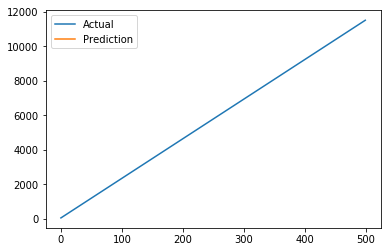

In [8]:
import time

epochs = 20
losses = []

for e in range(epochs):
    Y_prediction = np.array(X*parameters[0]+parameters[1])
    gradient_descent(X,Y, Y_prediction, parameters, learning_rate = 1e-4)
    losses.append(MSELoss(X, Y, Y_prediction))
    visualize(X,Y,Y_prediction,True)

visualize(X,Y,Y_prediction)

### Using frameworks for Linear Regression

Our actual slope and bias is: (11, 24)
Predicted: Slope = 11.0 bias = 24.0


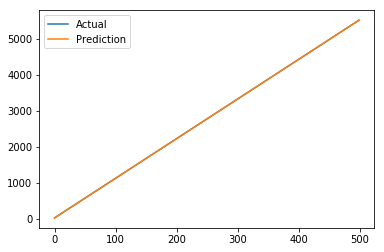

In [9]:
from sklearn.linear_model import LinearRegression

X,Y,_,_ = get_data()

lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X,Y)
print("Predicted: Slope = {:.1f} bias = {:.1f}".format(lr_model.coef_.squeeze(1)[0], lr_model.intercept_[0]))
visualize(X,Y,lr_model.predict(X))

Our actual slope and bias is: (42, 14)


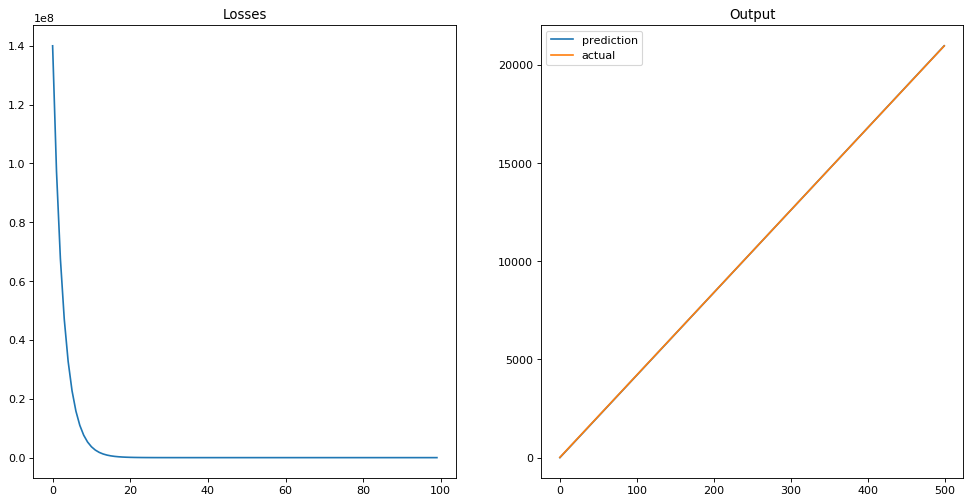

In [10]:
import tensorflow as tf
from tensorflow.contrib.losses import mean_squared_error as MSE

X,Y,_,_ = get_data()
losses = []

X_in = tf.placeholder(shape=X.shape, dtype=tf.float32)
weight = tf.Variable(1.0)
bias = tf.Variable(0.0)

cost = MSE(weight*X_in+bias,tf.constant(Y,dtype = tf.float32))
optimizer = tf.train.GradientDescentOptimizer(1e-6).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    epochs=100
    for e in range(epochs):
        _, c = sess.run([optimizer, cost],
                                   feed_dict={X_in: X})
        losses.append(c)
    preds = sess.run([weight*X_in+bias],
                                   feed_dict={X_in: X})

plotlo(epochs,losses,X,Y,preds)

Our actual slope and bias is: (11, 45)


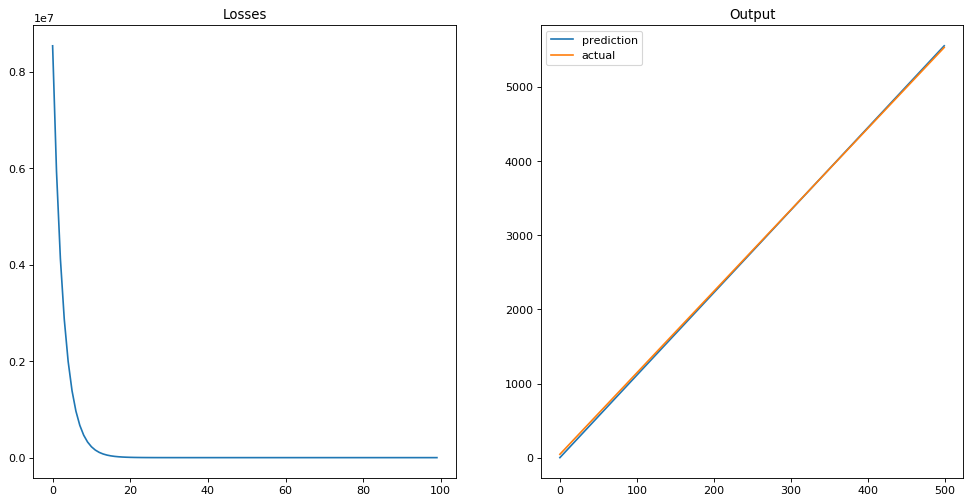

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

X,Y,_,_ = get_data()
losses = []

weight = torch.tensor(1.0, requires_grad=True)
bias = torch.tensor(0.0, requires_grad=True)

criterion = nn.MSELoss()
optimizer = optim.SGD([weight, bias],lr=1e-6)

epochs = 100
for e in range(epochs):
    optimizer.zero_grad()
    pred = weight*(torch.Tensor(X))+bias
    loss = criterion(pred, torch.Tensor(Y))
    loss.backward(retain_graph=True)
    losses.append(loss.item())
    optimizer.step()
    
plotlo(epochs,losses,X,Y,pred.detach().numpy())

### Logisitic Regression

#### Sigmoid
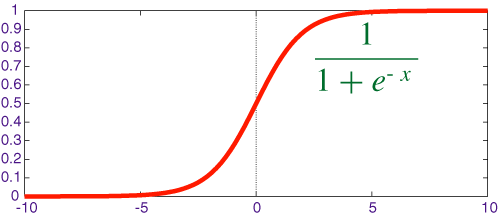

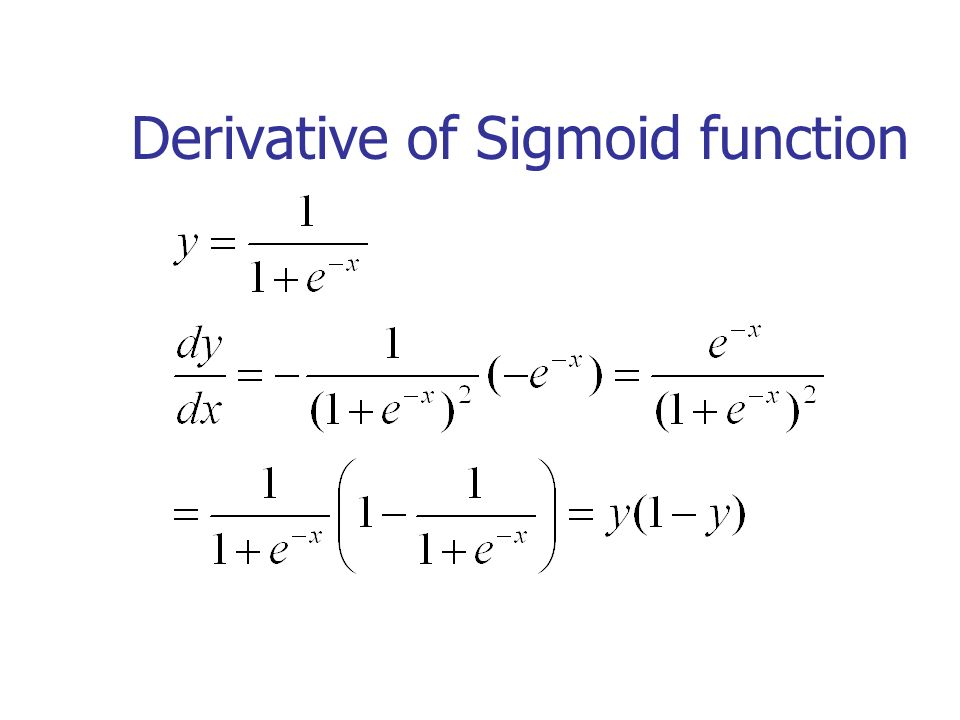

We should use a more appropiate loss function.

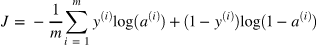

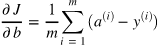

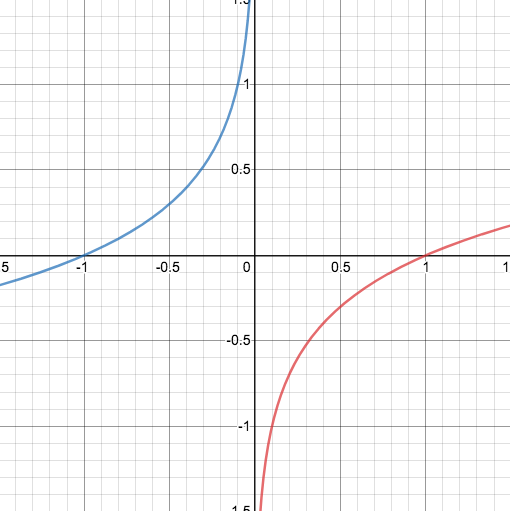

In [12]:
def linear_regression(data,W,b):
    return np.multiply(W,data)+b
def sigmoid(Y):
    return 1/(1+np.exp(-Y))
def cross_entropy(pred,Y):
    return -np.matmul(np.transpose(Y),np.log(pred)) - np.matmul(np.transpose(np.array([1])-Y),np.log(1-pred))
def dcross_entropy(X, Y_actual, Y_pred):
    dW = 1/X.shape[0] * np.mean(np.matmul(np.transpose(Y_pred-Y_actual), X),axis=0)
    dB = 1/X.shape[0] * np.mean((Y_pred-Y_actual),axis=0)
    return dW, dB
def log_gradient_descent(X,Y_actual, Y_pred, parameters, learning_rate = 0.01):
    dW, dB = dcross_entropy(X,Y_actual, Y_pred)
    parameters[0] -= np.multiply(learning_rate,dW)
    parameters[1] -= np.multiply(learning_rate,dB)

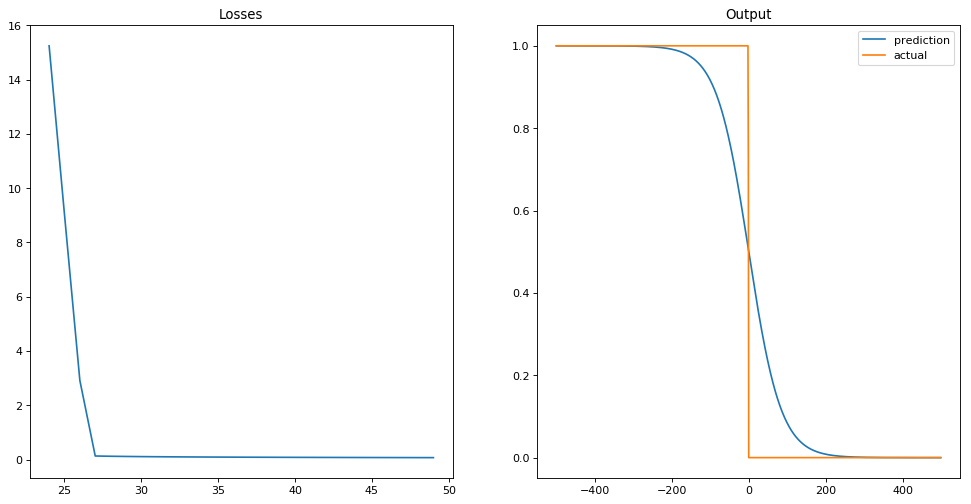

In [13]:
X,Y, _,_ = get_data(neg=True)
Y= sigmoid(-Y)

W = np.random.rand(1,1)
b = np.zeros(shape = (1,1))
params = [W,b]

num_epoch = 50
losses =[]

for epoch in range(num_epoch):
    lr_out = linear_regression(X,params[0],params[1])
    Y_pred = sigmoid(lr_out)
    c = cross_entropy(Y_pred,Y)
    log_gradient_descent(X,Y, Y_pred, params, 1e-4)
    losses.append(1/X.shape[0]*np.mean(c))
    visualize(X,Y,Y_pred,True)

pred = sigmoid(linear_regression(X,params[0],params[1]))

plotlo(num_epoch,losses,X,Y,pred)

### With frameworks for Logisitic Regression

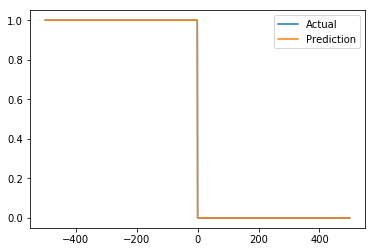

In [14]:
from sklearn.linear_model import LogisticRegression

X,Y, _,_ = get_data(neg=True)
Y= np.round(sigmoid(-Y))

log_model = LogisticRegression(n_jobs=-1)
log_model.fit(X,Y)

clear_output()
visualize(X,Y,log_model.predict(X))

Our actual slope and bias is: (49, 48)


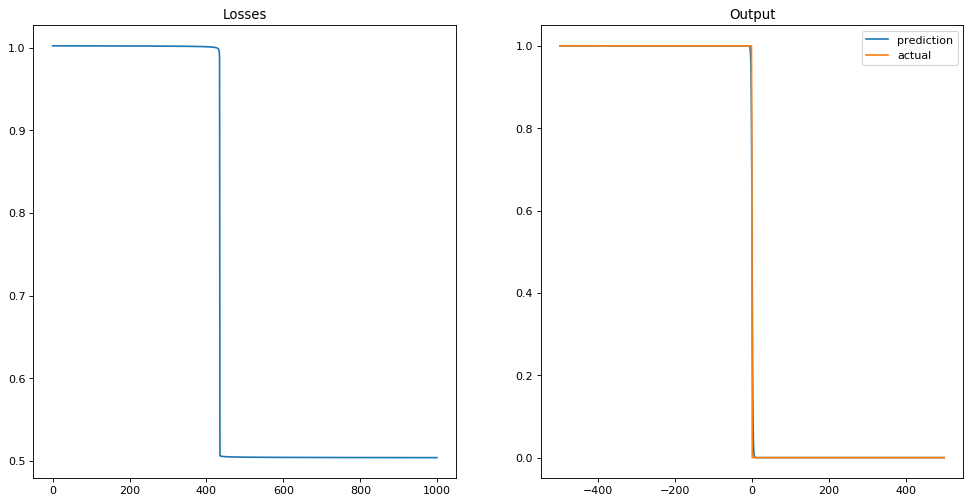

In [15]:
import tensorflow as tf
from tensorflow.contrib.losses import sigmoid_cross_entropy as SCE

X,Y, _,_ = get_data(neg=True)
Y= sigmoid(-Y)
losses = []

X_in = tf.placeholder(shape=X.shape, dtype=tf.float32)
weight = tf.Variable(1.0)
bias = tf.Variable(0.0)

cost = SCE(tf.sigmoid(weight*X_in+bias), tf.constant(Y,dtype = tf.float32))
optimizer = tf.train.GradientDescentOptimizer(1).minimize(cost)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    epochs=1000
    for e in range(epochs):
        _, c = sess.run([optimizer, cost],
                                   feed_dict={X_in: X})
        losses.append(c)
    preds = sess.run([tf.sigmoid(weight*X_in+bias)],
                                   feed_dict={X_in: X})

plotlo(epochs,losses,X,Y,preds)

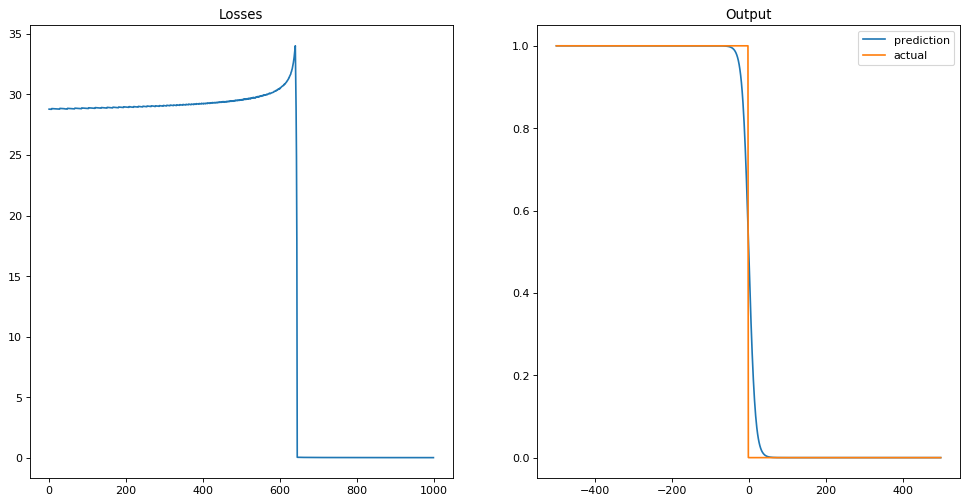

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

X,Y, _,_ = get_data(neg=True)
Y= sigmoid(-Y)

weight = torch.tensor(1.0, requires_grad=True)
bias = torch.tensor(0.0, requires_grad=True)
criterion = nn.BCELoss()
optimizer = optim.SGD([weight, bias],lr=1e-3)
losses = []

epochs = 1000
for e in range(epochs):
    optimizer.zero_grad()
    pred = torch.sigmoid(weight*(torch.Tensor(X))+bias)
    loss = criterion(pred, torch.Tensor(Y))
    loss.backward(retain_graph=True)
    losses.append(loss.item())
    optimizer.step()

clear_output()

plotlo(epochs,losses,X,Y,pred.detach().numpy())